# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

steps_month = fitbit.groupby('Months_encoded')['Steps'].mean()

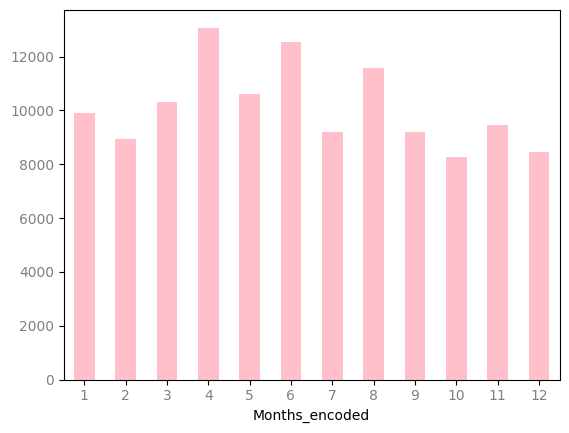

<Figure size 1200x400 with 0 Axes>

In [55]:

steps_month.plot.bar(color='pink')

plt.xticks(rotation=0,
           c = 'grey')
plt.yticks(c = 'grey')
plt.figure(figsize=(12, 4))
plt.savefig('../figure/steps_month.png')
plt.show()

In [7]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here

work_weekend = fitbit.groupby('Work_or_Weekend')['Steps'].mean()
work_weekend

Work_or_Weekend
0    10064.238095
1    10144.572519
Name: Steps, dtype: float64

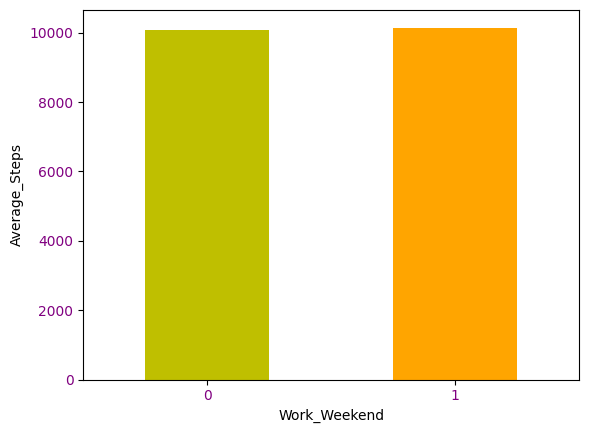

<Figure size 1200x400 with 0 Axes>

In [56]:
ax = work_weekend.plot.bar(color=['y', 'orange'])   
ax.set_xlabel('Work_Weekend')
ax.set_ylabel('Average_Steps')
plt.xticks(rotation=0,
           c = 'purple')
plt.yticks(c = 'purple')
plt.figure(figsize=(12, 4))
plt.savefig('../figure/work_weekend.png')
plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

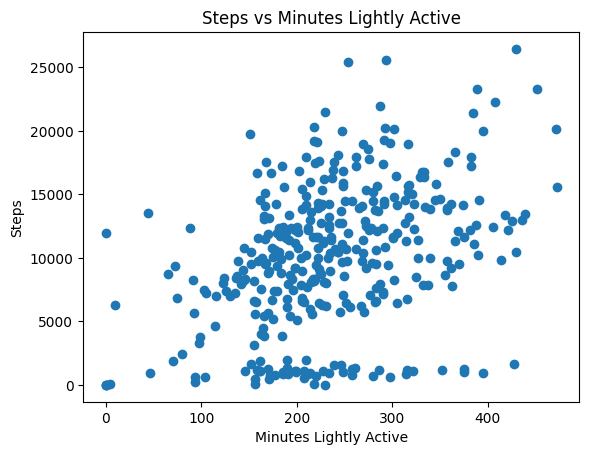

<Figure size 1200x400 with 0 Axes>

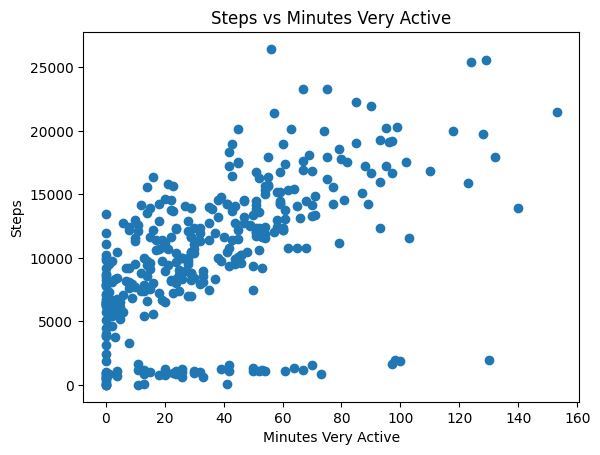

<Figure size 1200x400 with 0 Axes>

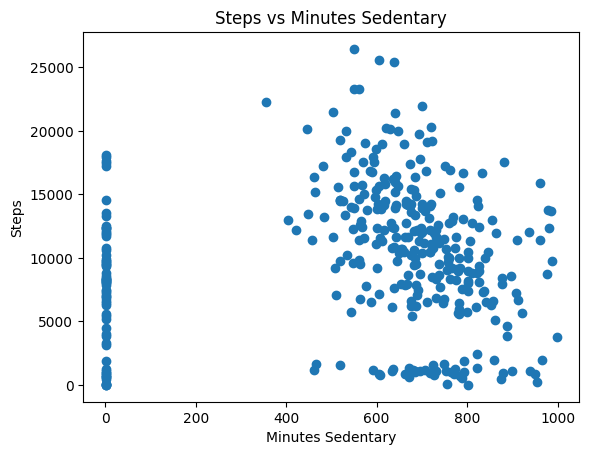

<Figure size 1200x400 with 0 Axes>

In [57]:
# your code here

features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i in features:
    plt.scatter(fitbit[i], fitbit['Steps'])
    plt.xlabel(i)
    plt.ylabel('Steps')
    plt.title('Steps vs ' + i)
    plt.figure(figsize=(12, 4))
    plt.savefig('../figure/' + i + '.png')
    plt.show()



## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [44]:
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [47]:
# your code here
titanic.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 489.8 KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [60]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include = 'number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [50]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include = 'object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [75]:
# your code here
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

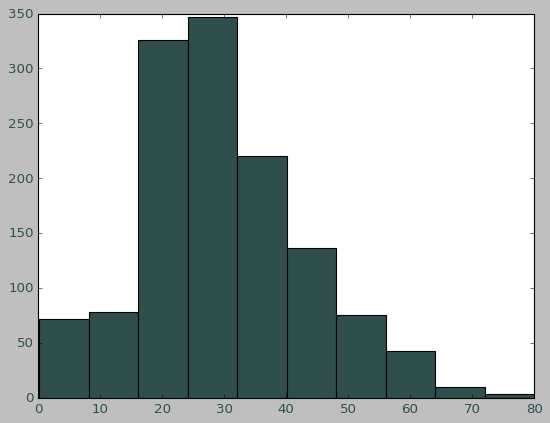

<Figure size 960x480 with 0 Axes>

In [81]:
# your code here
plt.hist(titanic.Age, bins=10, color= 'darkslategrey')
plt.xticks(rotation=0,
           c = 'darkslategrey')
plt.yticks(c = 'darkslategrey')
plt.figure(figsize=(12, 6))
plt.savefig('../figure/titanic_age.png')
plt.show()


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

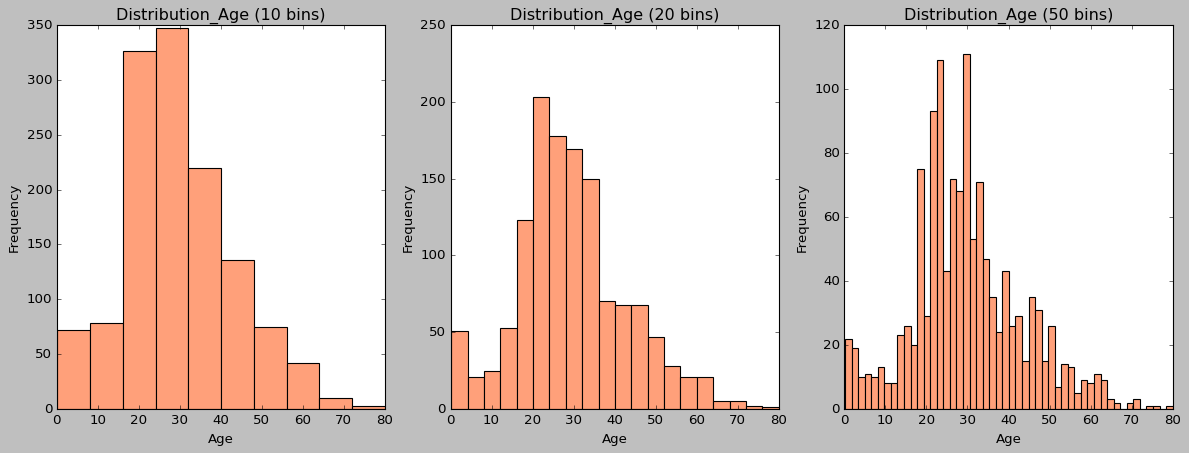

In [87]:
# your code here
ig, axes = plt.subplots(1, 3, figsize=(18, 6))
bin_values = [10, 20, 50]
for i, bins in enumerate(bin_values):
    ax = axes[i]
    ax.hist(titanic['Age'], bins=bins, color='lightsalmon')
    ax.set_title(f'Distribution_Age ({bins} bins)')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
#plt.tight_layout()
plt.show();

#### How does the bin size affect your plot?

In [ ]:
"""
Permite ver con más detalle la distribución de la edad, ya que por ejemplo, en la primera y segunda gráfica no se aprecia que sobre los 25 años hay una bajada 
en la frecuencia de los pasos, lo cual sí se observa en la última gráfica. El número de barras es importante para conocer con rigor el dato. 
La frecuencia máxima va disminuyendo conforme aumentan el número de barras.
"""

#### Use seaborn to show the distribution of column `Age`.

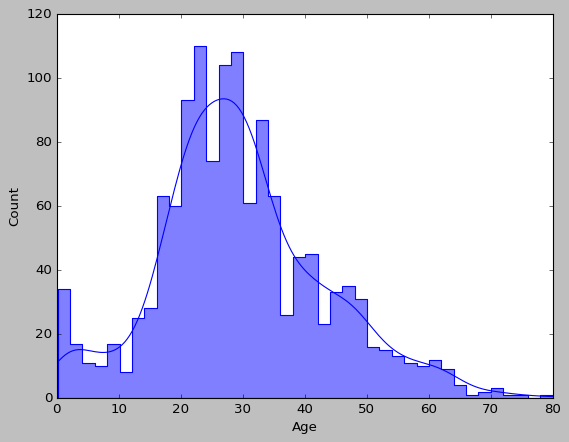

In [88]:
sns.histplot(x = titanic.Age,
             bins=40,          
             kde = True,      
             element='step');

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

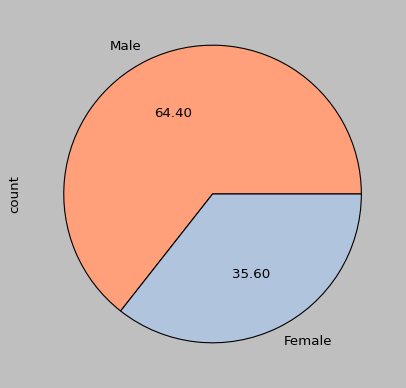

In [142]:
# Method 1 - matplotlib
# your code here
total = titanic.Gender.value_counts()
total.plot.pie(labels=['Male', 'Female'],
               colors=['lightsalmon', 'lightsteelblue'],
               autopct='%.2f',
               subplots=True,
               figsize=(6, 6));

<Axes: xlabel='Gender', ylabel='count'>

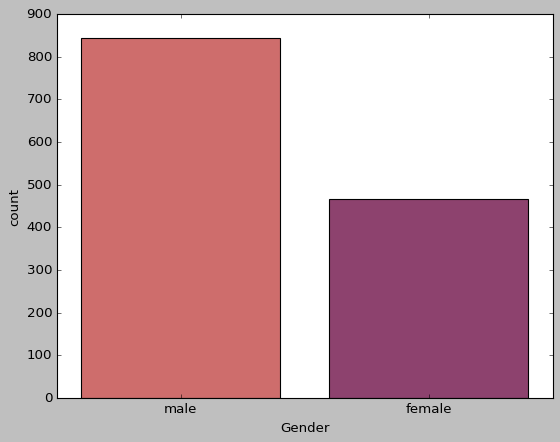

In [138]:
# Method 2 - seaborn
# your code here

sns.countplot(x=titanic.Gender, palette='flare')

#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass', ylabel='count'>

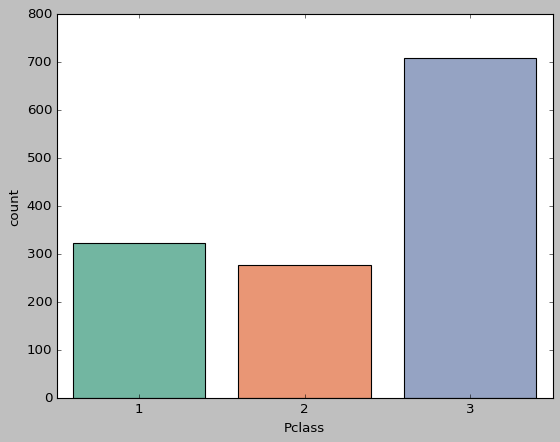

In [141]:
# your code here
sns.countplot(x=titanic.Pclass, palette='Set2')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Axes: ylabel='Age'>

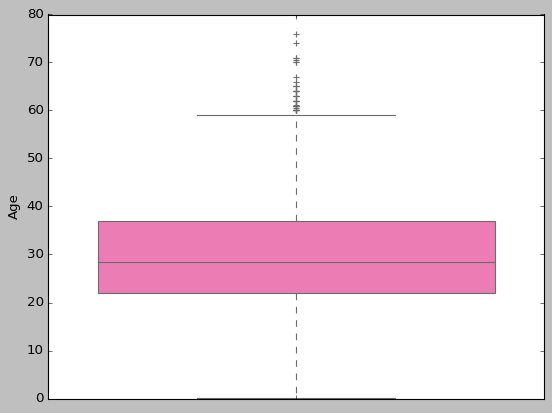

In [157]:
# your code here
sns.boxplot(data = titanic.Age, color= 'hotpink')

In [ ]:
"""
Este gráfico y el violin plot son los mejores para visualizar la estadística descriptiva de una columna. 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
La mayor parte de los pasajeros estaban entre los 22 y los 37 aproximadamente, apareciendo outliers a partir de los 60 años. Las edades están en un rango entre
0 y 80 años, siendo la mediana los 28 aprox
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: ylabel='Age'>

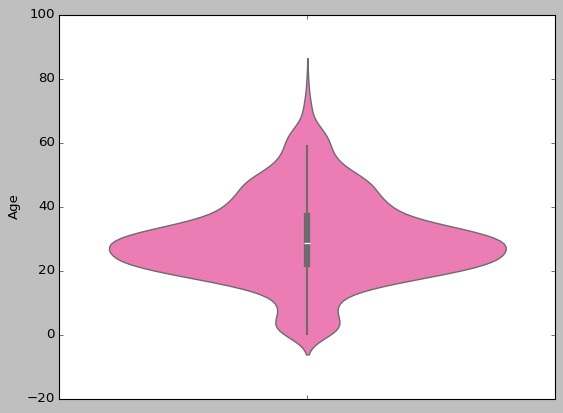

In [159]:
sns.violinplot(data = titanic.Age, color= 'hotpink')

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Nos muestra que la forma de los datos es simétrica y además es más sensible a los valores atípicos, porque en esa vemos que hay valores por encima de 80 años
mientras que en el boxplot no se ve.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
corr=df.corr(method='pearson')

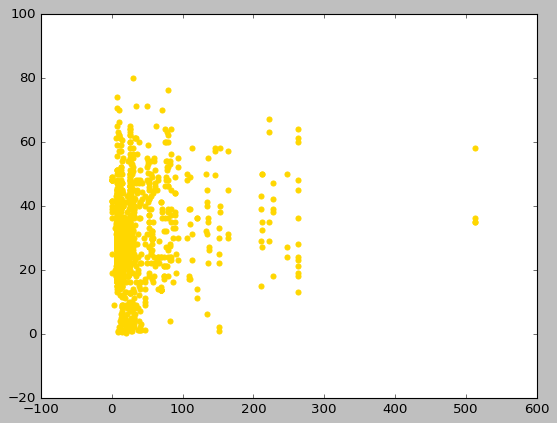

In [167]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Fare'], titanic['Age'], color = 'gold')
plt.show()

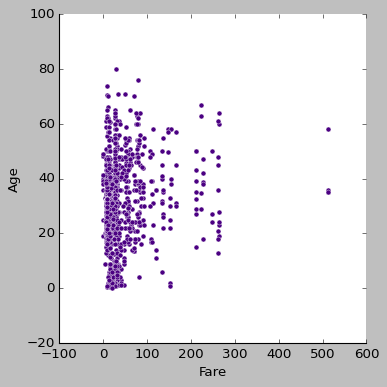

In [165]:
# Method 2 - seaborn
# your code here

sns.relplot(x=titanic.Fare, y=titanic.Age, data=titanic, color = 'indigo')

#### Plot the correlation matrix using seaborn.

In [175]:
# your code here
corr = (titanic.select_dtypes(include = np.number)).corr()
corr


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


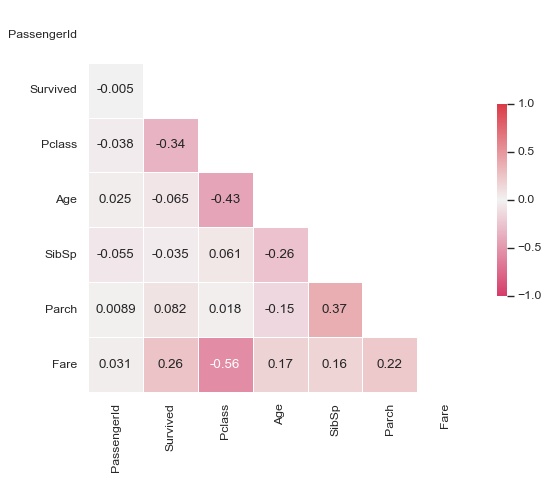

In [176]:
sns.set(style='white')       # estilo blanco

mascara = np.triu(np.ones_like(corr, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores



sns.heatmap(corr,             # datos
            mask=mascara,     # mascara
            cmap=cmap,        # mapa de color
            
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
            
           );

#### What are the most correlated features?

In [ ]:
"""
Pclass y Fare son las variables más correlacionadas
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [183]:
# your code here
#titanic.groupby('Pclass').describe('Age')
Age_Pclass = pd.pivot_table(titanic, values = 'Age', index = 'Pclass', aggfunc = 'describe').T
Age_Pclass

Pclass,1,2,3
25%,30.000000,22.948773,20.000000
50%,40.000000,29.000000,25.315435
75%,49.000000,36.500000,31.456100
count,323.000000,277.000000,709.000000
max,80.000000,70.000000,74.000000
mean,39.555048,29.977433,25.432757
min,0.920000,0.670000,0.170000
std,13.863639,13.563141,10.605975


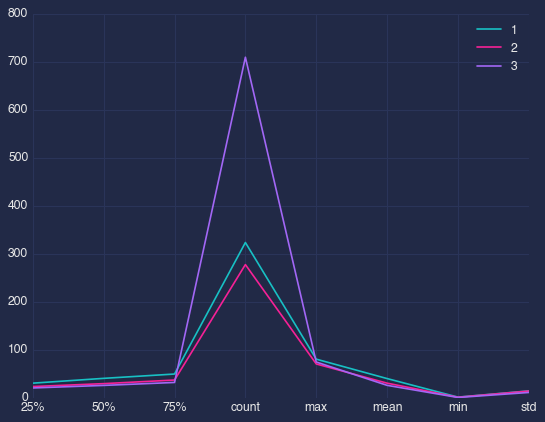

In [187]:
plt.plot(Age_Pclass)
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.legend(Age_Pclass.columns);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

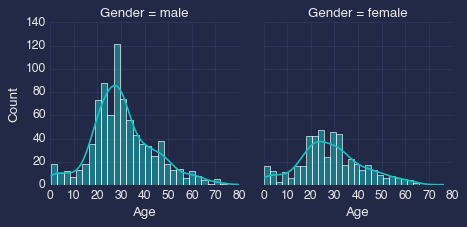

In [192]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age", bins=30, kde=True)
g.set_axis_labels("Age", "Count")
plt.show()